In [1]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
  name : str
  number : List[int]
  counter : int

def greeting_node(state: AgentState) -> AgentState:
  """Greeting Node which says Hi to the person"""
  state['name'] = f"Hi there, {state['name']}"
  state['counter'] = 0
  return state

def random_node(state : AgentState) -> AgentState:
  """Generate a random number from 0 to 10"""
  state['number'].append(random.randint(0,10))
  state['counter'] += 1
  return state

def should_continue(state : AgentState) -> AgentState:
  """Function to decide what to do next"""
  if state['counter'] < 5:
    return 'loop'
  else:
    return 'exit'

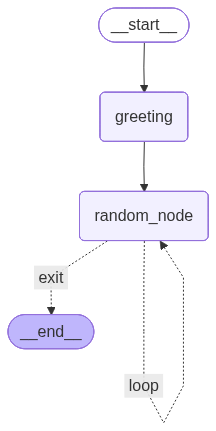

In [3]:
graph = StateGraph(AgentState)

graph.add_node('greeting', greeting_node)
graph.add_node('random_node', random_node)

graph.add_edge(START, 'greeting')
graph.add_edge('greeting', 'random_node')

graph.add_conditional_edges(
    'random_node',
    should_continue,
    {
        'loop' : 'random_node',
        'exit' : END
    }
)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [4]:
result = app.invoke({'name':'Sri Harsha', 'number':[], 'counter':-2})
result

{'name': 'Hi there, Sri Harsha', 'number': [9, 3, 9, 1, 10], 'counter': 5}

#### Exercise

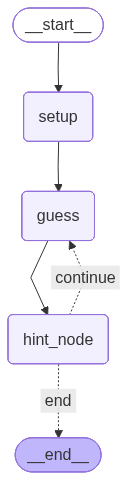

In [5]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
  player : str
  guesses : List[int]
  counter : int
  target : int
  lower_bound : int
  upper_bound : int

def setup(state : AgentState) -> AgentState:
  """This is just a dummy setup Node"""
  state['player'] = f"Hi {state['player']}, Lets start the game"
  state['target'] = random.randint(1, 20)
  print(f"The Target is {state['target']}\n")
  state['counter'] = 0
  return state

def guess(state : AgentState) -> AgentState:
  """This will have guess logic"""
  if state['counter'] < 7:
    state['guesses'].append(random.randint( state['lower_bound'] , state['upper_bound']))
    print(state['guesses'])
    state['counter'] += 1
    print(f"The guessed number in attempt {state['counter']} is {state['guesses'][-1]}")
  print('The state in guess node', state, '\n')
  return state

def hint_node(state : AgentState) -> AgentState:
  """This will have a loop logic"""
  if state['guesses'][-1] < state['target']:
    state['lower_bound'] = state['guesses'][-1]
  elif state['guesses'][-1] > state['target']:
    state['upper_bound'] = state['guesses'][-1]
  print(f"The Updated Lower and Upper bounds are ({state['lower_bound']}, {state['upper_bound']})")
  return state

def should_continue(state : AgentState) -> AgentState:
  """This will have a loop logic"""
  if state['guesses'][-1] < state['target']:
    return 'continue'
  elif state['guesses'][-1] > state['target']:
    return 'continue'
  else:
    return 'end'

graph = StateGraph(AgentState)

graph.add_node('setup', setup)
graph.add_node('guess', guess)
graph.add_node('hint_node', hint_node)

graph.add_edge(START, 'setup')
graph.add_edge('setup', 'guess')
graph.add_edge('guess', 'hint_node')

graph.add_conditional_edges(
    'hint_node',
    should_continue,
    {
        'continue' : 'guess',
        'end' : END
    }
)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"player": "Student", "guesses": [], "counter": 0, "lower_bound": 1, "upper_bound": 20})

The Target is 17

[10]
The guessed number in attempt 1 is 10
The state in guess node {'player': 'Hi Student, Lets start the game', 'guesses': [10], 'counter': 1, 'target': 17, 'lower_bound': 1, 'upper_bound': 20} 

The Updated Lower and Upper bounds are (10, 20)
[10, 16]
The guessed number in attempt 2 is 16
The state in guess node {'player': 'Hi Student, Lets start the game', 'guesses': [10, 16], 'counter': 2, 'target': 17, 'lower_bound': 10, 'upper_bound': 20} 

The Updated Lower and Upper bounds are (16, 20)
[10, 16, 18]
The guessed number in attempt 3 is 18
The state in guess node {'player': 'Hi Student, Lets start the game', 'guesses': [10, 16, 18], 'counter': 3, 'target': 17, 'lower_bound': 16, 'upper_bound': 20} 

The Updated Lower and Upper bounds are (16, 18)
[10, 16, 18, 16]
The guessed number in attempt 4 is 16
The state in guess node {'player': 'Hi Student, Lets start the game', 'guesses': [10, 16, 18, 16], 'counter': 4, 'target': 17, 'lower_bound': 16, 'upper_bound': 18} 


In [7]:
result

{'player': 'Hi Student, Lets start the game',
 'guesses': [10, 16, 18, 16, 18, 17],
 'counter': 6,
 'target': 17,
 'lower_bound': 16,
 'upper_bound': 18}